In [2]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

#import pyspark
#from datetime import datetime
#from pyspark.sql.types import IntegerType, FloatType
#from pyspark.sql.functions import udf,lit

#from pyspark.sql import SQLContext
#from pyspark.sql.functions import mean

#sc = pyspark.SparkContext.getOrCreate()
#sqlContext = SQLContext(sc)

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

from bokeh.layouts import gridplot
from bokeh.plotting import figure

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
output_notebook()

Loading BokehJS ...

In [3]:
#data = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true')\
#        .load('train.csv')
#from pyspark.sql.functions import udf
#from pyspark.sql.types import IntegerType
#getDate = lambda x : udf( lambda y : int(y.split("/")[x]), IntegerType())
#sales = data.withColumn('Day', getDate(0)(data["Date"])).withColumn('Month', getDate(1)(data["Date"])).withColumn('Year', getDate(2)(data["Date"]))\
#    .drop("Date").toPandas()
# d.coalesce(1).write.csv("./train",header=True)

In [4]:
sales_string_date=pd.read_csv('train.csv')
sales = sales_string_date
sales.head(5)

,StoreID,Date,IsHoliday,IsOpen,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
0,1000,01/03/2016,0,1,0,Hyper Market,General,326,7,495,...,1,11.0,16,-2,70,1029,1,6.0,0.0,23
1,1000,02/03/2016,0,1,0,Hyper Market,General,326,7,608,...,3,13.0,10,-2,58,1025,1,10.0,0.0,56
2,1000,04/03/2016,0,1,0,Hyper Market,General,326,7,665,...,3,11.0,10,-3,55,1023,2,8.0,0.0,22
3,1000,05/03/2016,0,1,0,Hyper Market,General,326,7,630,...,3,15.0,10,-6,25,1022,-1,10.0,0.0,108
4,1000,06/03/2016,0,0,0,Hyper Market,General,326,7,0,...,1,12.0,5,-6,48,1022,-5,5.0,0.0,46


In [5]:
sales_string_date.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


In [6]:
import datetime as d
def toDate(x):
    parts = [int(el) for el in x.split("/")]
    return d.date(parts[2], parts[1], parts[0])
sales_datetime_date = sales_string_date
sales_datetime_date["Date"] = sales_string_date["Date"].apply(toDate)
sales_datetime_sorted = sales_datetime_date.sort_values("Date")

In [7]:
stores = [store for store in sales_datetime_sorted["StoreID"]]
stores.sort()
stores = list(set(stores))
# distinct stores sorted
dataByStores = []
# list of tuples (store, dataframe with datapoints for that store)
for store in stores:
    dataByStores.append((store, sales_datetime_sorted[sales_datetime_sorted["StoreID"] == store]))

In [9]:
len(stores)

749

In [10]:
p1 = figure(x_axis_type="datetime", title="Sales", plot_width=900, plot_height=450)
source = ColumnDataSource(sales_datetime_sorted[sales_datetime_sorted["StoreID"] == stores[0]][["Date", "NumberOfSales"]])
p1.line("Date", "NumberOfSales", source=source)
show(p1)

In [11]:
total_number = sales.shape[0]
total_number

523021

In [12]:
sales.describe()


,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


# Heatmap plotting

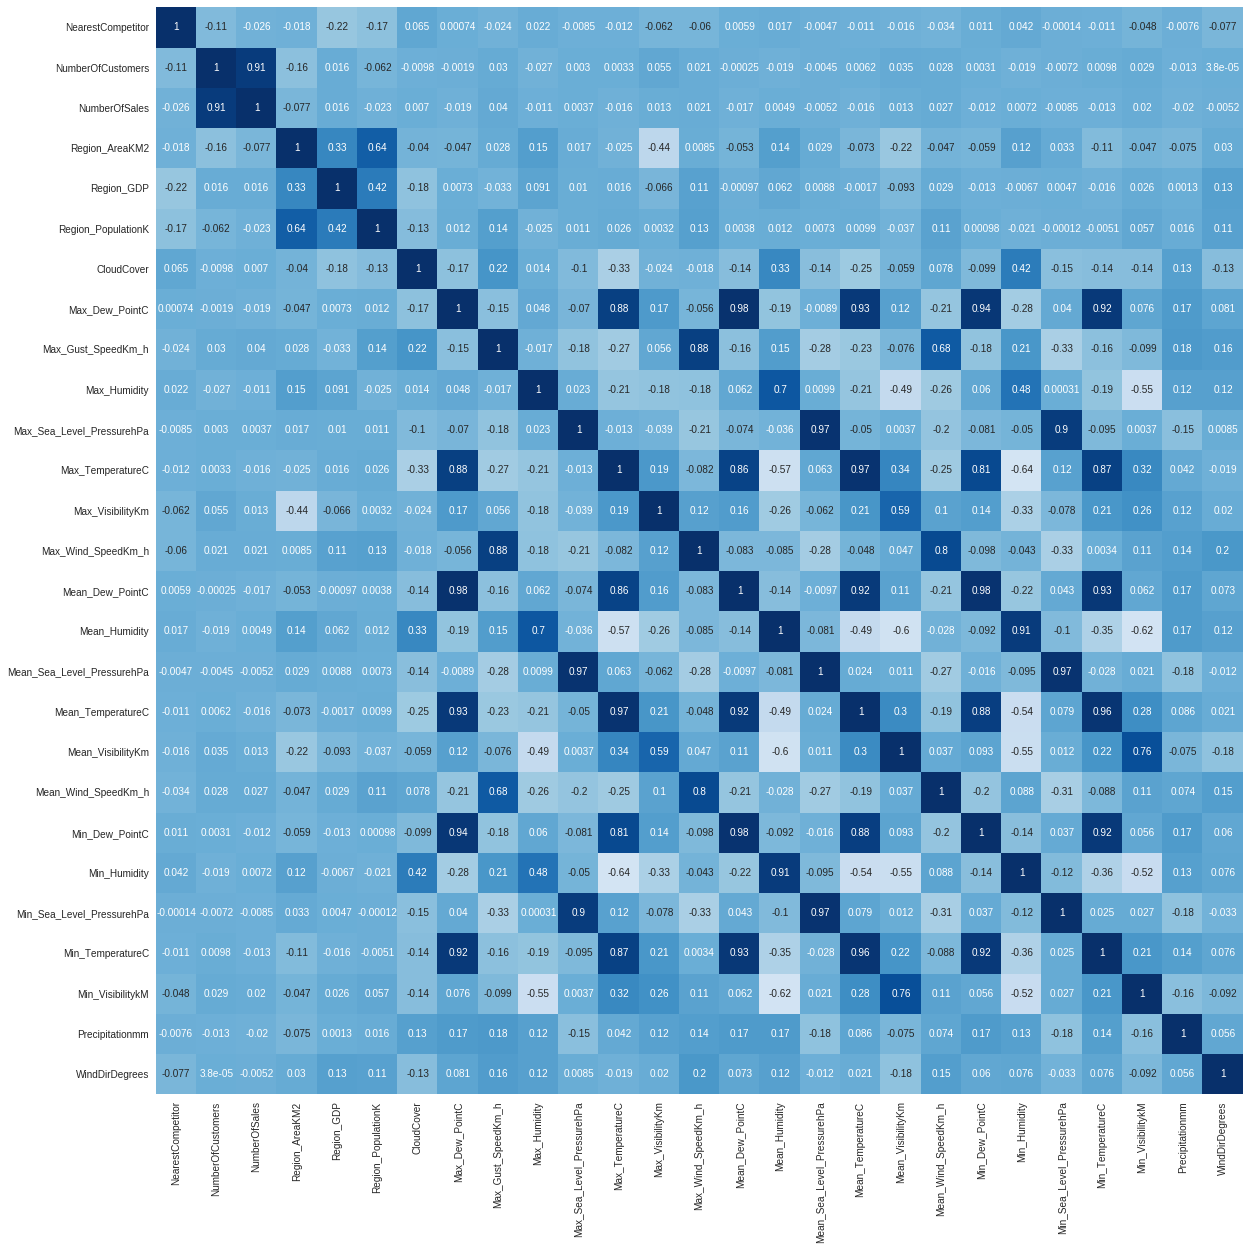

In [13]:
categorical_variables_mask = (sales.dtypes==object) | (sales.columns == "Day") | (sales.columns == "Month") | (sales.columns == "Year") | (sales.columns == "StoreID") | (sales.columns == "IsOpen") | (sales.columns == "IsHoliday") | (sales.columns == "HasPromotions") | (sales.columns == "Region"  )
categorical_variables = categorical_variables_mask.tolist()
numerical_variables = sales.columns[~categorical_variables_mask]
cov=sales[numerical_variables].corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [14]:
unknown_per_columns = sales.isnull().sum()
unknown_per_columns

StoreID                            0
Date                               0
IsHoliday                          0
IsOpen                             0
HasPromotions                      0
StoreType                          0
AssortmentType                     0
NearestCompetitor                  0
Region                             0
NumberOfCustomers                  0
NumberOfSales                      0
Region_AreaKM2                     0
Region_GDP                         0
Region_PopulationK                 0
CloudCover                     41181
Events                        124098
Max_Dew_PointC                     0
Max_Gust_SpeedKm_h            409947
Max_Humidity                       0
Max_Sea_Level_PressurehPa          0
Max_TemperatureC                   0
Max_VisibilityKm               11338
Max_Wind_SpeedKm_h                 0
Mean_Dew_PointC                    0
Mean_Humidity                      0
Mean_Sea_Level_PressurehPa         0
Mean_TemperatureC                  0
M

In [15]:
null_data = sales['Events'].isnull()
event_missing = sales[null_data]
event_missing.describe()
#By this, we discover that when Event is null the weather is good, from the fact that Precipitationmm mean is almost 0.
#Furthermore, all the labels of Events are related to bad weather, that means that when no precipitation occurs the label is null.

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,...,124098.000000,113238.000000,124098.000000,124098.000000,124098.000000,124098.000000,124098.000000,113238.000000,124098.000000,124098.000000
mean,1370.938661,0.025343,0.835316,0.391352,8598.544852,5.708537,262.825307,4087.681623,11494.095529,13693.732615,...,11.397339,15.122741,11.231527,2.934141,40.231946,1015.213468,6.417211,10.525875,0.006096,136.669519
std,215.467924,0.157165,0.370897,0.488055,12179.726740,3.333467,186.579039,2734.958540,8355.170418,2738.751299,...,7.461739,6.641841,5.166388,6.112321,18.089280,7.166503,6.551161,6.132783,0.113929,105.369671
min,1000.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-11.000000,2.000000,3.000000,-17.000000,10.000000,986.000000,-12.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1130.000000,3.000000,169.000000,2607.000000,7215.000000,11849.000000,...,6.000000,10.000000,8.000000,-2.000000,25.000000,1011.000000,1.000000,8.000000,0.000000,47.000000
50%,1369.000000,0.000000,1.000000,0.000000,3628.000000,6.000000,254.000000,4027.000000,9337.000000,13155.000000,...,12.000000,13.000000,10.000000,3.000000,37.000000,1016.000000,7.000000,10.000000,0.000000,125.000000
75%,1553.000000,0.000000,1.000000,1.000000,10593.000000,9.000000,349.000000,5557.000000,15566.000000,15931.000000,...,17.000000,19.000000,14.000000,8.000000,53.000000,1020.000000,12.000000,10.000000,0.000000,219.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.000000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,34.000000,18.000000,100.000000,1038.000000,23.000000,31.000000,4.060000,360.000000


# Imputation of Cloud Cover


In [16]:
null_CloudCover = sales['CloudCover'].isnull()
cloudcover_missing = sales[(null_data)]
null_Events = sales['Events'].isnull()
event_missing = sales[null_Events]
event_cc_missing = sales[null_CloudCover & null_Events]
cloudcover_missing.shape, event_missing.shape, event_cc_missing.shape 
#there are 28k tuples where both "Events" and "CloudCover" are missing, that means that the weather should be good.
#for the remaining (41k-28k) (i.e. where "Events" is not null!) tuples we impute the CloudCoverage

((124098, 36), (124098, 36), (28274, 36))

In [17]:
sales[null_CloudCover & ~null_Events].shape

(12907, 36)

In [18]:
sales[null_CloudCover & ~null_Events]["CloudCover"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: CloudCover, dtype: float64

In [19]:
event_notmissing_cc_missing = sales[null_CloudCover & ~null_Events]
#computing mean where CloudCover is not null
mean_CC = sales["CloudCover"].mean()
event_notmissing_cc_missing["CloudCover"] = event_notmissing_cc_missing["CloudCover"].fillna(mean_CC)

sales = pd.concat([sales[~null_CloudCover | null_Events], event_notmissing_cc_missing])

# Imputation of VisibilityKm

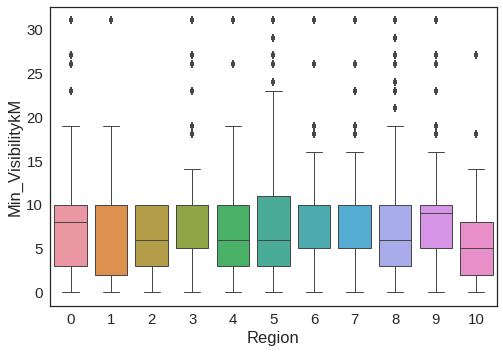

In [20]:
null_MinVisibilityKm = sales['Min_VisibilitykM'].isnull()
minVisKm_missing = sales[null_MinVisibilityKm]

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(x="Region", y="Min_VisibilitykM", data=sales)

In [21]:
null_ = sales['CloudCover'].isnull()
cloudcover_missing = sales[(null_data)]

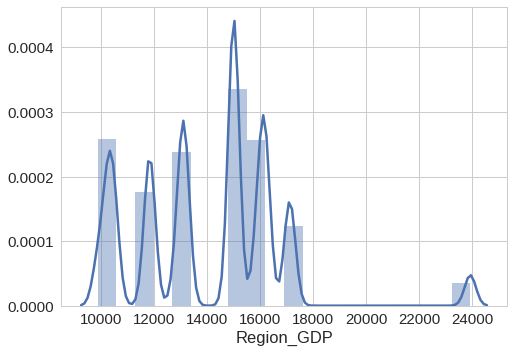

In [22]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
dp = sns.distplot(sales['Region_GDP'],bins=20)


In [30]:
# checking if are all the same rows where visibility data are missing => yes, they are
sales[["Max_VisibilityKm", "Mean_VisibilityKm", "Min_VisibilitykM"]].count()

Max_VisibilityKm     511683
Mean_VisibilityKm    511683
Min_VisibilitykM     511683
dtype: int64

In [31]:
null_visibility = sales[sales['Max_VisibilityKm'].isnull()]
mean_vis_max = sales["Max_VisibilityKm"].mean()
mean_vis_mean = sales["Mean_VisibilityKm"].mean()
mean_vis_min = sales["Min_VisibilitykM"].mean()

null_visibility["Max_VisibilityKm"] = null_visibility["Max_VisibilityKm"].fillna(mean_vis_max)
null_visibility["Mean_VisibilityKm"] = null_visibility["Mean_VisibilityKm"].fillna(mean_vis_mean)
null_visibility["Min_VisibilitykM"] = null_visibility["Min_VisibilitykM"].fillna(mean_vis_min)

sales = pd.concat([sales[~sales['Max_VisibilityKm'].isnull()], null_visibility])

In [32]:
sales["Max_VisibilityKm"].describe()

count    523021.000000
mean         23.560275
std           9.069769
min           0.000000
25%          11.000000
50%          31.000000
75%          31.000000
max          31.000000
Name: Max_VisibilityKm, dtype: float64

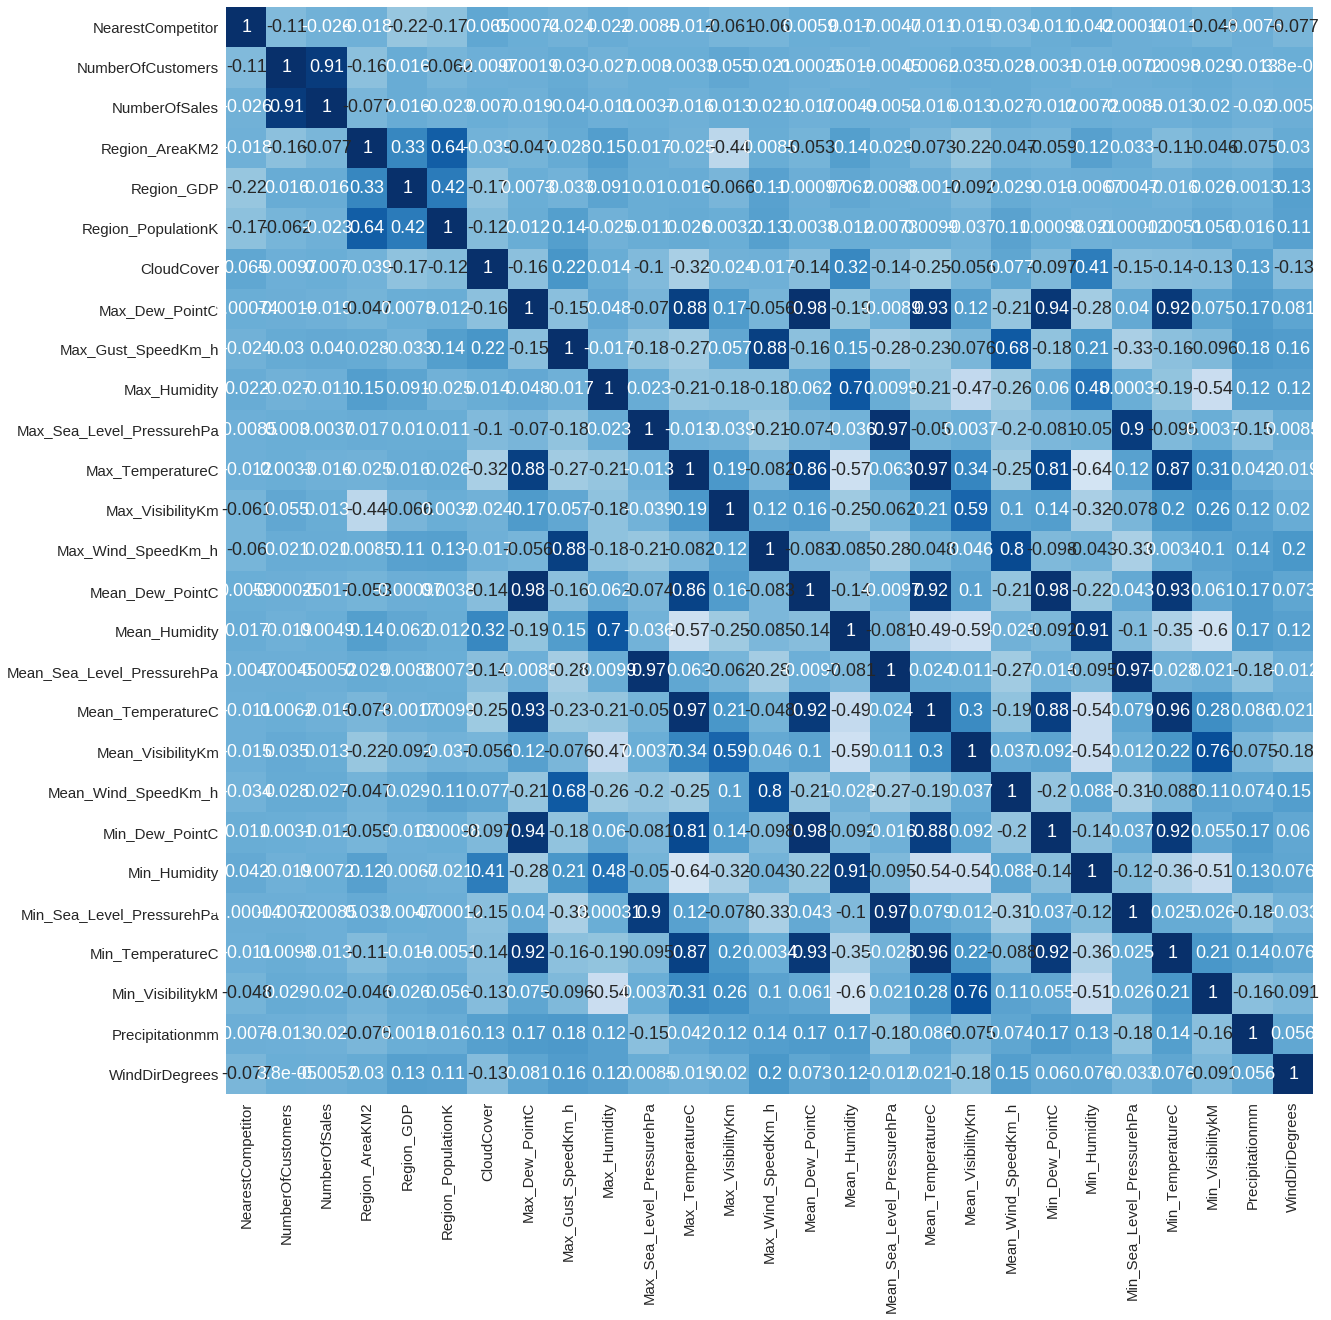

In [33]:
cov=sales[numerical_variables].corr(method='pearson')
plt.figure(figsize = (20,20))
sns.heatmap(cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

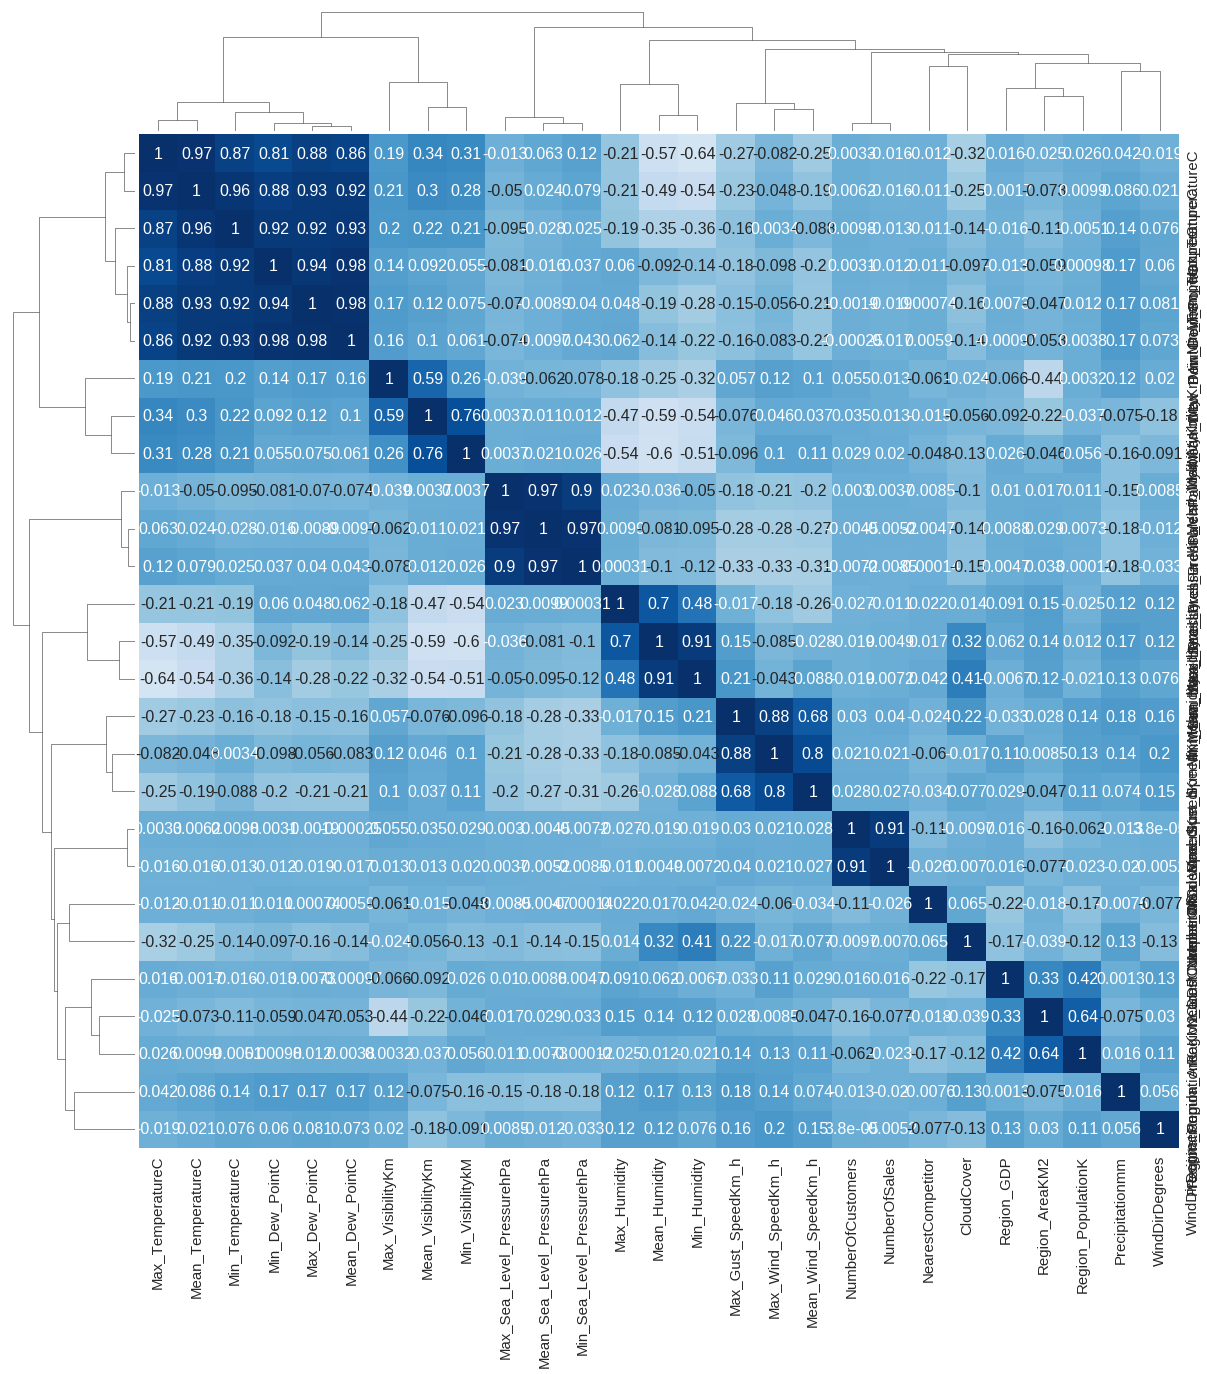

In [52]:
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(20, 20))
cm.cax.set_visible(False)

In [35]:
from sklearn.preprocessing import StandardScaler


numerical_variables = sales.columns[~(categorical_variables_mask | (sales.columns == "CloudCover"))]


In [36]:
unknown_per_columns = sales.isnull().sum()
unknown_per_columns

StoreID                            0
Date                               0
IsHoliday                          0
IsOpen                             0
HasPromotions                      0
StoreType                          0
AssortmentType                     0
NearestCompetitor                  0
Region                             0
NumberOfCustomers                  0
NumberOfSales                      0
Region_AreaKM2                     0
Region_GDP                         0
Region_PopulationK                 0
CloudCover                     28274
Events                        124098
Max_Dew_PointC                     0
Max_Gust_SpeedKm_h            409947
Max_Humidity                       0
Max_Sea_Level_PressurehPa          0
Max_TemperatureC                   0
Max_VisibilityKm                   0
Max_Wind_SpeedKm_h                 0
Mean_Dew_PointC                    0
Mean_Humidity                      0
Mean_Sea_Level_PressurehPa         0
Mean_TemperatureC                  0
M

In [37]:
# mask to normalize, avoiding categorical_varibles and columns with unhandled NaN
normalization_mask = ~(categorical_variables | ((sales.columns == "CloudCover") | (sales.columns == "IsOpen") | (sales.columns == "IsHoliday") | (sales.columns == "HasPromotions") | (sales.columns == "Region"  ) | ( sales.columns == "Max_Gust_SpeedKm_h" ) | ( sales.columns == "NumberOfSales" ) | ( sales.columns == "NumberOfCustomers")))
normalization_mask = normalization_mask.tolist()
normalization_mask = sales.columns[normalization_mask]

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(sales[normalization_mask])
df_normalized_values = scaler.transform(sales[normalization_mask])
sales_normalized = pd.DataFrame(data = df_normalized_values, columns=normalization_mask)

Normalized: 'NearestCompetitor', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'Max_Dew_PointC', 'Max_Humidity', 'Max_Sea_Level_PressurehPa', 'Max_TemperatureC', 'Max_VisibilityKm',
       'Max_Wind_SpeedKm_h', 'Mean_Dew_PointC', 'Mean_Humidity',
       'Mean_Sea_Level_PressurehPa', 'Mean_TemperatureC', 'Mean_VisibilityKm',
       'Mean_Wind_SpeedKm_h', 'Min_Dew_PointC', 'Min_Humidity',
       'Min_Sea_Level_PressurehPa', 'Min_TemperatureC', 'Min_VisibilitykM',
       'Precipitationmm', 'WindDirDegrees'

In [39]:
sales_normalized.describe()

,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,Max_Dew_PointC,Max_Humidity,Max_Sea_Level_PressurehPa,Max_TemperatureC,Max_VisibilityKm,Max_Wind_SpeedKm_h,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,...,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05,5.230210e+05
mean,-5.401538e-17,-4.955938e-17,-2.911886e-16,2.382328e-16,9.477146e-17,-6.173187e-16,1.287675e-15,8.520736e-17,1.482434e-16,4.347314e-18,...,8.172951e-17,1.121607e-16,-1.869345e-17,-1.956292e-18,9.737984e-17,3.203971e-16,-1.086829e-17,-9.390199e-17,-6.912230e-17,-9.911877e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.895407e-01,-1.316889e+00,-1.508860e+00,-1.081230e+00,-3.759335e+00,-6.501357e+00,-5.276102e+00,-3.101894e+00,-2.597673e+00,-2.203190e+00,...,-3.305308e+00,-2.467652e+00,-1.679316e+00,-3.678667e+00,-2.145593e+00,-4.837031e+00,-3.358524e+00,-1.490538e+00,-3.071634e-01,-1.685455e+00
25%,-6.020016e-01,-5.651947e-01,-7.989873e-01,-9.118841e-01,-7.534720e-01,-4.625363e-01,-6.427998e-01,-7.837710e-01,-1.384852e+00,-9.424847e-01,...,-8.909334e-01,-4.368340e-01,-6.432300e-01,-8.017449e-01,-7.973252e-01,-5.837799e-01,-8.240656e-01,-8.714934e-01,-3.071634e-01,-9.383651e-01
50%,-4.057752e-01,-2.995690e-01,3.507455e-01,-3.875147e-01,8.148998e-02,6.257852e-02,-1.667788e-02,7.027430e-02,8.202781e-01,-1.402176e-01,...,1.032209e-01,-2.337523e-01,-1.251870e-01,4.440883e-02,-1.947850e-02,1.059364e-01,1.263562e-01,1.602485e-01,-3.071634e-01,2.019295e-01
75%,1.447680e-01,3.484131e-01,6.824550e-01,6.622891e-01,7.494596e-01,8.502507e-01,6.094441e-01,8.023131e-01,8.202781e-01,4.328304e-01,...,8.133311e-01,3.754931e-01,3.928559e-01,7.213318e-01,7.583682e-01,6.807001e-01,7.599707e-01,5.729453e-01,-2.121579e-01,7.819069e-01
max,6.679608e+00,2.170487e+00,3.585821e+00,1.521090e+00,2.419384e+00,8.502507e-01,3.113932e+00,2.754417e+00,8.202781e-01,9.028550e+00,...,2.801640e+00,3.827884e+00,7.127415e+00,2.413639e+00,2.521487e+00,2.979755e+00,2.819218e+00,4.906261e+00,2.208754e+01,1.863221e+00


# PCA other normalized columns

In [40]:
from sklearn.decomposition import PCA


In [41]:
NC95p=sales['Region_GDP'].quantile(.95)
NC95p

17130.0

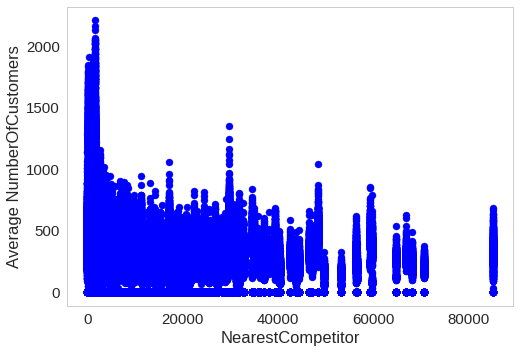

In [42]:
avgSalesForCompDist=sales
avgSalesForCompDist.groupby('NearestCompetitor', as_index=False)['NumberOfCustomers'].mean()
x = avgSalesForCompDist['NearestCompetitor']
y = avgSalesForCompDist['NumberOfCustomers']
#plt.figure(figsize=(20,10))
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)
#plt.ylim((1.75,7.25))
#plt.xlim((10,80))
plt.xlabel("NearestCompetitor")
plt.ylabel("Average NumberOfCustomers")
plt.scatter(x, y, color='blue', marker='o', s=50)
plt.grid()

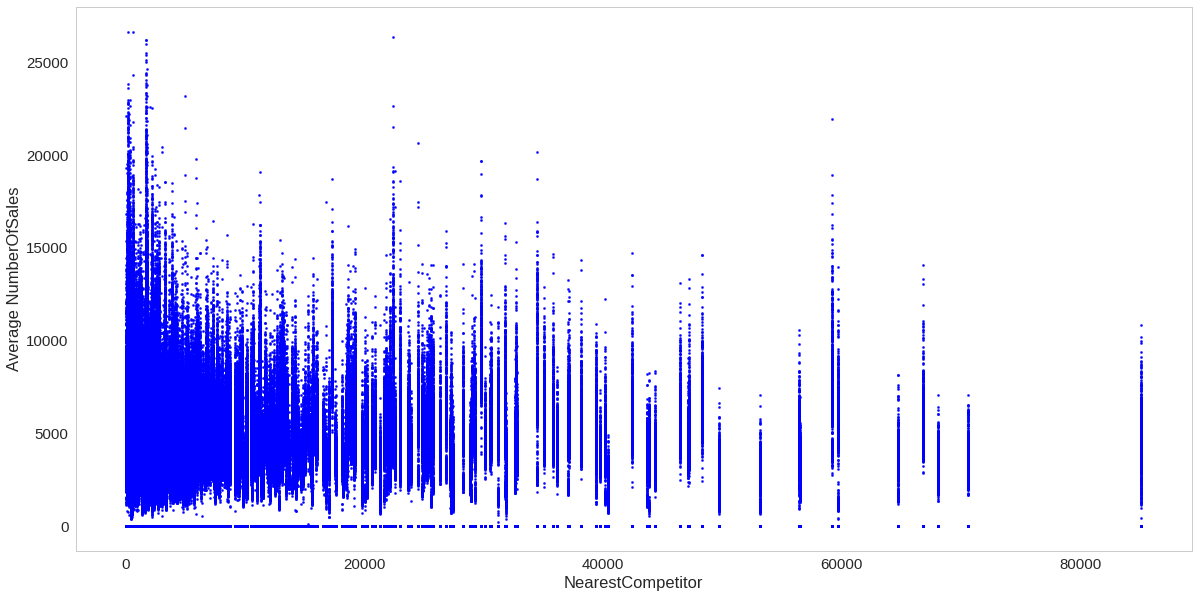

In [43]:
avgSalesForCompDist=sales
avgSalesForCompDist.groupby('NearestCompetitor', as_index=False)['NumberOfSales'].mean()
x = avgSalesForCompDist['NearestCompetitor']
y = avgSalesForCompDist['NumberOfSales']
font = {'family' : 'sans', 'size'   : 16}
plt.figure(figsize=(20,10))
plt.rc('font', **font)
#plt.ylim((1.75,7.25))
#plt.xlim((10,80))
plt.xlabel("NearestCompetitor")
plt.ylabel("Average NumberOfSales")
plt.scatter(x, y, color='blue', marker='o', s=5)
plt.grid()

In [44]:
NC95p=sales['NearestCompetitor'].quantile(.95)
NC95p

31210.0

In [45]:
#Winsorizing di  NearestCompetitor sul 95th percentile
#index1=np.where(sales['NearestCompetitor']>=NC95p)
#sales['NearestCompetitor'][index1]

q = sales["NearestCompetitor"].quantile(0.95)
sales.loc[sales["NearestCompetitor"]>q,"NearestCompetitor"]=q


In [46]:
sales['StoreType'].value_counts()

Hyper Market       292769
Standard Market    148986
Super Market        74705
Shopping Center      6561
Name: StoreType, dtype: int64

In [47]:
sales['AssortmentType'].value_counts()

General                     296188
With Non-Food Department    224646
With Fish Department          2187
Name: AssortmentType, dtype: int64

In [48]:
cols=sales.columns
num_cols = sales._get_numeric_data().columns
list(set(cols)-set(num_cols))

['StoreType', 'Date', 'AssortmentType', 'Events']

In [49]:
sales['Events'].describe()

count     398923
unique        21
top         Rain
freq      204733
Name: Events, dtype: object

In [50]:
sales['Events'].value_counts()

Rain                           204733
Fog                             67797
Fog-Rain                        50908
Rain-Thunderstorm               21988
Rain-Snow                       18176
Snow                            15433
Fog-Rain-Thunderstorm            8567
Fog-Rain-Snow                    3225
Fog-Snow                         2857
Thunderstorm                     1485
Rain-Hail                        1331
Rain-Snow-Hail                    629
Rain-Hail-Thunderstorm            283
Fog-Rain-Snow-Hail                231
Rain-Snow-Thunderstorm            220
Snow-Hail                         194
Rain-Snow-Hail-Thunderstorm       193
Fog-Rain-Hail-Thunderstorm        178
Fog-Rain-Hail                     169
Fog-Snow-Hail                     169
Fog-Thunderstorm                  157
Name: Events, dtype: int64

In [51]:
#sales['Events'].isnull()
